In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a sample dataset
data = {
    'Date': ['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05',
             '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10'],
    'Customer_ID': ['C001','C002','C003','C001','C004','C002','C003','C005','C001','C002'],
    'Product': ['Shoes','Bag','Watch','Shoes','Perfume','Watch','Bag','Shoes','Watch','Perfume'],
    'Quantity': [2,1,1,3,2,1,4,1,2,3],
    'Price_per_unit': [2000,1500,2500,2000,1800,2500,1500,2000,2500,1800]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate total purchase value
df['Total_Price'] = df['Quantity'] * df['Price_per_unit']

df.to_csv('customer_purchases.csv', index=False)
print("✅ Sample dataset created successfully!")
df.head()


In [3]:
# Load dataset
df = pd.read_csv('customer_purchases.csv')

# View first few rows
print("Dataset Preview:")
display(df.head())

# Check dataset info
print("\nDataset Info:")
df.info()


Dataset Preview:


,Date,Customer_ID,Product,Quantity,Price_per_unit,Total_Price
0,2025-01-01,C001,Shoes,2,2000,4000
1,2025-01-02,C002,Bag,1,1500,1500
2,2025-01-03,C003,Watch,1,2500,2500
3,2025-01-04,C001,Shoes,3,2000,6000
4,2025-01-05,C004,Perfume,2,1800,3600



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            10 non-null     object
 1   Customer_ID     10 non-null     object
 2   Product         10 non-null     object
 3   Quantity        10 non-null     int64 
 4   Price_per_unit  10 non-null     int64 
 5   Total_Price     10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


In [5]:
total_revenue = df['Total_Price'].sum()
print(f"💰 Total Revenue: ₹{total_revenue}")


💰 Total Revenue: ₹38500



🏆 Top Customers by Spending:
Customer_ID
C001    15000
C002     9400
C003     8500
C004     3600
C005     2000
Name: Total_Price, dtype: int64


/tmp/ipython-input-315222925.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="viridis")


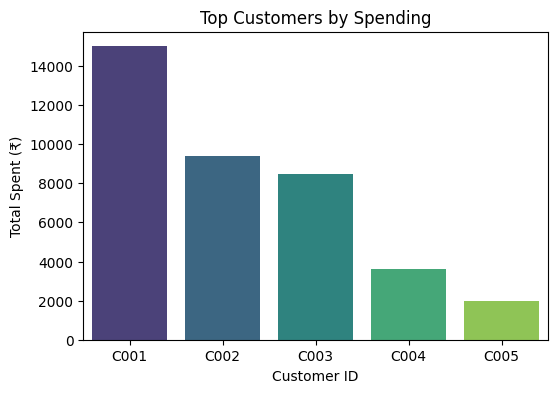

In [6]:
top_customers = df.groupby('Customer_ID')['Total_Price'].sum().sort_values(ascending=False)
print("\n🏆 Top Customers by Spending:")
print(top_customers)

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="viridis")
plt.title("Top Customers by Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent (₹)")
plt.show()



🛍️ Most Popular Products:
Product
Shoes      6
Bag        5
Perfume    5
Watch      4
Name: Quantity, dtype: int64


/tmp/ipython-input-3880585306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="plasma")


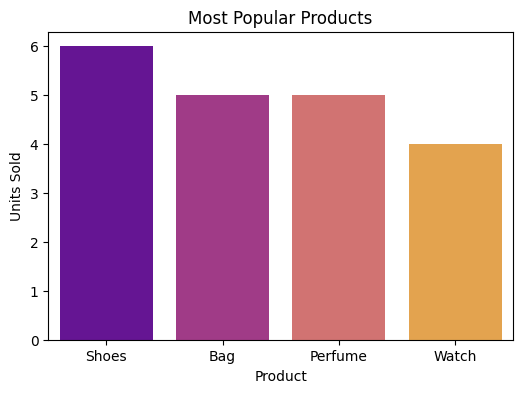

In [7]:
product_sales = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("\n🛍️ Most Popular Products:")
print(product_sales)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="plasma")
plt.title("Most Popular Products")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.show()



📅 Daily Revenue:
Date
2025-01-01    4000
2025-01-02    1500
2025-01-03    2500
2025-01-04    6000
2025-01-05    3600
2025-01-06    2500
2025-01-07    6000
2025-01-08    2000
2025-01-09    5000
2025-01-10    5400
Name: Total_Price, dtype: int64


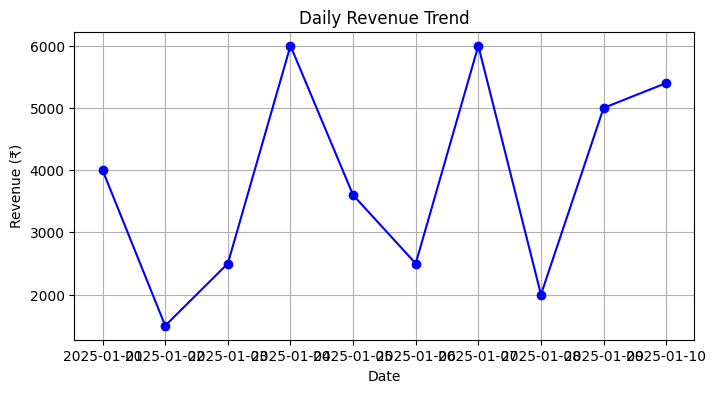

In [8]:
daily_revenue = df.groupby('Date')['Total_Price'].sum()
print("\n📅 Daily Revenue:")
print(daily_revenue)

# Line chart
plt.figure(figsize=(8,4))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o', color='blue')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (₹)")
plt.grid(True)
plt.show()


In [9]:
# Save key results
summary = pd.DataFrame({
    'Total_Revenue': [total_revenue],
    'Top_Customer': [top_customers.index[0]],
    'Top_Product': [product_sales.index[0]]
})
summary.to_csv('analysis_summary.csv', index=False)
print("📁 Analysis summary saved successfully as 'analysis_summary.csv'")


📁 Analysis summary saved successfully as 'analysis_summary.csv'


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [11]:
# Create a larger dataset (30 days)
np.random.seed(42)
dates = pd.date_range(start='2025-01-01', periods=30)

customers = ['C001','C002','C003','C004','C005','C006','C007']
products  = ['Shoes','Bag','Watch','Perfume','Shirt','Jeans']

data = {
    'Date': np.random.choice(dates, 100),
    'Customer_ID': np.random.choice(customers, 100),
    'Product': np.random.choice(products, 100),
    'Quantity': np.random.randint(1, 5, 100),
    'Price_per_unit': np.random.choice([800,1200,1500,1800,2000,2500], 100)
}

df = pd.DataFrame(data)
df['Total_Price'] = df['Quantity'] * df['Price_per_unit']
df.to_csv('customer_purchase_advanced.csv', index=False)
print("✅ Advanced dataset created!")
df.head()


✅ Advanced dataset created!


,Date,Customer_ID,Product,Quantity,Price_per_unit,Total_Price
0,2025-01-07,C002,Watch,4,2500,10000
1,2025-01-20,C006,Jeans,4,2500,10000
2,2025-01-29,C004,Perfume,3,2500,7500
3,2025-01-15,C006,Bag,4,2500,10000
4,2025-01-11,C007,Bag,1,2500,2500


In [12]:
print("Data Summary:\n")
display(df.describe())

print("Missing Values:\n")
print(df.isnull().sum())

print("\nUnique Customers:", df['Customer_ID'].nunique())
print("Unique Products:", df['Product'].nunique())


Data Summary:



,Date,Quantity,Price_per_unit,Total_Price
count,100,100.000000,100.000000,100.000000
mean,2025-01-16 15:07:12,2.740000,1664.000000,4571.000000
min,2025-01-01 00:00:00,1.000000,800.000000,800.000000
25%,2025-01-08 00:00:00,2.000000,1200.000000,2400.000000
50%,2025-01-18 00:00:00,3.000000,1800.000000,3800.000000
75%,2025-01-25 00:00:00,4.000000,2000.000000,6000.000000
max,2025-01-30 00:00:00,4.000000,2500.000000,10000.000000
std,NaN,1.211227,588.358442,2777.917794


Missing Values:

Date              0
Customer_ID       0
Product           0
Quantity          0
Price_per_unit    0
Total_Price       0
dtype: int64

Unique Customers: 7
Unique Products: 6


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


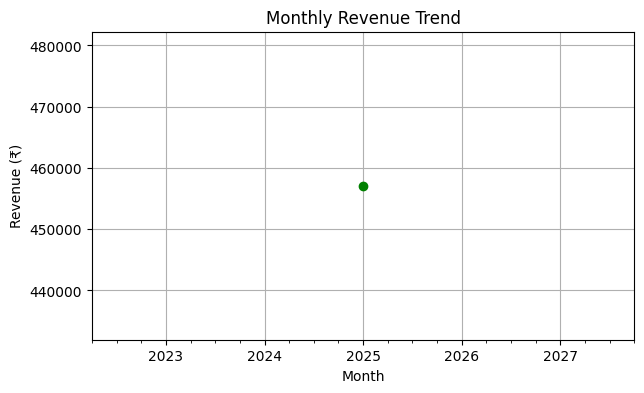

In [13]:
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
monthly_revenue = df.groupby('Month')['Total_Price'].sum()

plt.figure(figsize=(7,4))
monthly_revenue.plot(marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.grid(True)
plt.show()


/tmp/ipython-input-3793137904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='rocket')


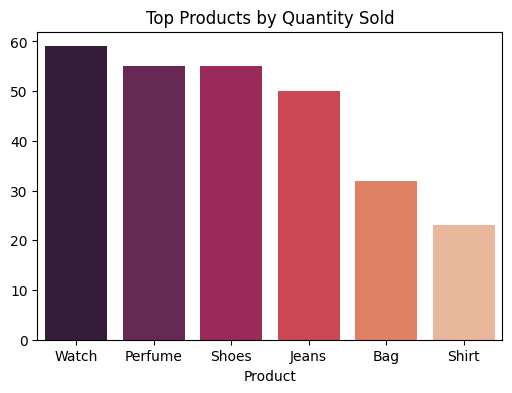

/tmp/ipython-input-3793137904.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='mako')


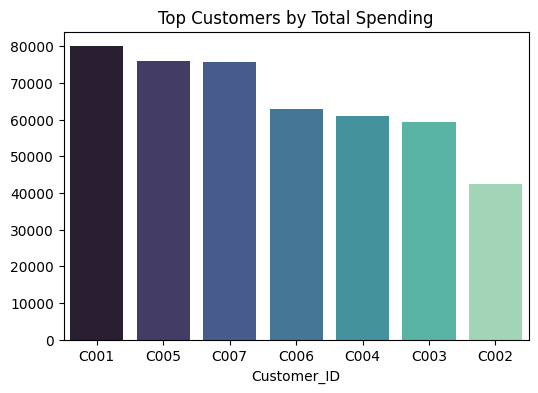

In [14]:
# Top products by quantity sold
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=top_products.index, y=top_products.values, palette='rocket')
plt.title("Top Products by Quantity Sold")
plt.show()

# Top customers by spending
top_customers = df.groupby('Customer_ID')['Total_Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='mako')
plt.title("Top Customers by Total Spending")
plt.show()


📊 Customer Segmentation:


,Customer_ID,Total_Spending,Total_Units_Bought,Cluster
0,C001,80000,43,1
1,C002,42400,24,2
2,C003,59300,36,0
3,C004,60900,34,0
4,C005,76000,46,1
5,C006,62800,36,0
6,C007,75700,55,1


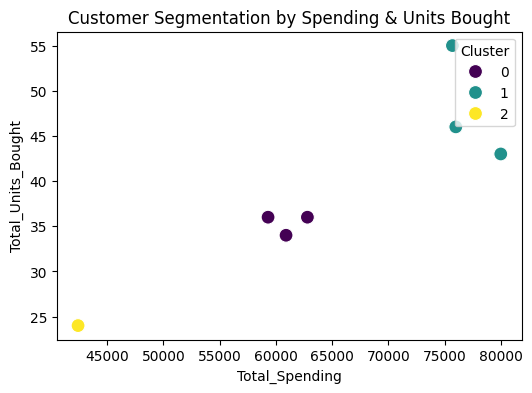

In [15]:
# Create a summary table per customer
customer_summary = df.groupby('Customer_ID').agg({
    'Total_Price': 'sum',
    'Quantity': 'sum'
}).reset_index()

customer_summary.rename(columns={
    'Total_Price': 'Total_Spending',
    'Quantity': 'Total_Units_Bought'
}, inplace=True)

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary[['Total_Spending','Total_Units_Bought']])

# Apply K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_data)

print("📊 Customer Segmentation:")
display(customer_summary)

# Visualize clusters
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Total_Spending', y='Total_Units_Bought',
    hue='Cluster', data=customer_summary, palette='viridis', s=100
)
plt.title("Customer Segmentation by Spending & Units Bought")
plt.show()


In [16]:
customer_summary.to_csv('customer_segments.csv', index=False)
monthly_revenue.to_csv('monthly_revenue.csv')
print("📁 Files saved successfully!")


📁 Files saved successfully!
